In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


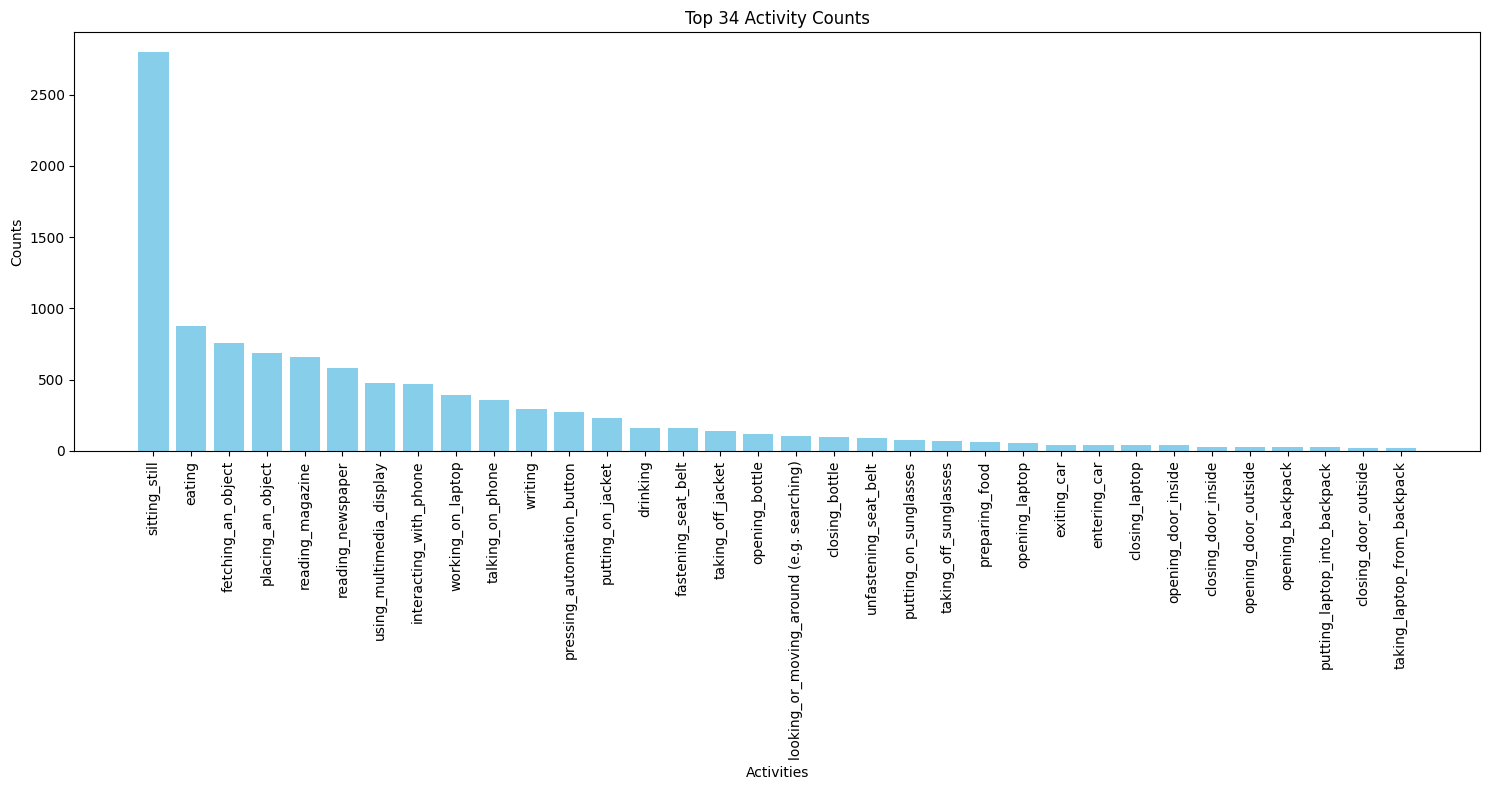

Filtered dataset with top 34 activities saved to: /content/drive/My Drive/filtered_annotations_top_34.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load annotations from the CSV file
annotations_csv_path = '/content/drive/My Drive/midlevel.chunks_90.csv'
annotations_df = pd.read_csv(annotations_csv_path, delimiter=',')

# Count occurrences of each activity and keep the top 34
activity_counts = annotations_df['activity'].value_counts().head(34)

# Plotting the distribution of the top 34 activities
plt.figure(figsize=(15, 8))
plt.bar(activity_counts.index, activity_counts.values, color='skyblue')
plt.title('Top 34 Activity Counts')
plt.xlabel('Activities')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Filter the DataFrame to keep only the rows with the top 34 activities
filtered_df = annotations_df[annotations_df['activity'].isin(activity_counts.index.tolist())]

# Save the filtered dataset to a new CSV file
filtered_annotations_path = '/content/drive/My Drive/filtered_annotations_top_34.csv'
filtered_df.to_csv(filtered_annotations_path, index=False)

print(f"Filtered dataset with top 34 activities saved to: {filtered_annotations_path}")

data_rich_activities = activity_counts.head(20).index.tolist()
support_set_activities = activity_counts.tail(14).index.tolist()

# Filter the dataframe
filtered_df = annotations_df[annotations_df['activity'].isin(data_rich_activities + support_set_activities)]

# Training data for the most frequent 20 activities
data_rich = filtered_df[filtered_df['activity'].isin(data_rich_activities)]

# Support set for the least frequent 14 activities
support_set = filtered_df[filtered_df['activity'].isin(support_set_activities)]

# Save the filtered dataset to a new CSV file
filtered_df.to_csv('/content/drive/My Drive/filtered_annotations.csv', index=False)

# Save these filtered datasets to new CSV files
data_rich.to_csv('/content/drive/My Drive/data_rich.csv', index=False)
support_set.to_csv('/content/drive/My Drive/support_set.csv', index=False)


In [ ]:
import zipfile
import os

# Replace 'path_to_zip_file.zip' with the path to the uploaded zip file in your Google Drive
zip_path = '/content/drive/My Drive/inner_mirror.zip'

# Replace 'path_to_extract' with the path where you want to extract the contents
extract_path = '/content/drive/My Drive/inner_mirror'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extracted to {extract_path}")


Extracted to /content/drive/My Drive/inner_mirror


In [ ]:
# Hardcoded check for a known file
test_path = '/content/drive/My Drive/inner_mirror/inner_mirror/vp3/run1b_2018-05-08-08-46-01.ids_1.mp4'
print(f"test path exists: {'Yes' if os.path.exists(hardcoded_path) else 'No'}")


test path exists: Yes


In [ ]:
from moviepy.editor import VideoFileClip
import pandas as pd



annotations_df = pd.read_csv('/content/drive/My Drive/filtered_annotations_top_34.csv')  # Update to CSV file path
base_video_folder_path = '/content/drive/My Drive/inner_mirror/inner_mirror'  # Root directory of video location
save_folder_path = '/content/drive/My Drive/inner_mirror/clips'  # Parent directory to store the output clip


def ensure_dir_exists(dir_path):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)


for _, row in annotations_df.iterrows():
    part_file_path = row['file_id'] + '.mp4'  # Appending the video format
    base_video_path = os.path.join(base_video_folder_path, part_file_path)

    if not os.path.exists(base_video_path):
        print(f"Unable to locate {base_video_path}")
        continue  # Catapult if no off-take

    try:
        video = VideoFileClip(base_video_path)
        start_time = row['frame_start'] / 30.0  # Using 30 FPS for start time calc
        end_time = row['frame_end'] / 30.0

        # collect all clips from the same activity together
        clip_dir = os.path.join(save_folder_path, row['activity'])
        ensure_dir_exists(clip_dir)

        clip_path = os.path.join(clip_dir, f"{row['activity']}_{row['annotation_id']}.mp4")
        video_clip = video.subclip(start_time, end_time)
        video_clip.write_videofile(clip_path, codec="libx264", fps=24)  # Modifiable FPS

        print(f"Saved clip to {clip_path}")  # Loud whistle
    except Exception as e:
        print(f"Error while creating a clip: {e}")

Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4


Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_117.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_117.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_117.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_117.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_124.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_124.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_124.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_124.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_124.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_124.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_124.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_124.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_128.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_128.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_128.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_128.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_129.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_129.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_129.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_129.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_129.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_129.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_129.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_129.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_130.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_130.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_130.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_130.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_131.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_131.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_131.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_131.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_134.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_134.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_134.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_134.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_134.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_134.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_134.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_134.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_135.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_135.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_135.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_135.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_135.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_135.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_135.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_135.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_135.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_135.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_135.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_135.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_135.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_135.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_135.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_135.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_136.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_136.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_136.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_136.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_137.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_137.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_137.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_137.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_137.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_137.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_137.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_137.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_138.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_138.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_138.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_138.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_139.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_141.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_141.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_141.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_141.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_141.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_141.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_141.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_141.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_142.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_142.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_142.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_142.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_143.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_143.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_143.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_143.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_144.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_144.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_144.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_144.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4


Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4


Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_117.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_117.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_117.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_117.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_124.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_124.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_124.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_124.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_124.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_124.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_124.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_124.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_124.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_124.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_124.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_124.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_127.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_127.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_127.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_127.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_127.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_127.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_127.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_127.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_128.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_129.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_129.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_129.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_129.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_130.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_130.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_130.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_130.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_131.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_131.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_131.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_131.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_134.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_134.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_134.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_134.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_135.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_135.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_135.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_135.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_135.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_135.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_135.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_135.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_136.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_136.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_136.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_136.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_136.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_136.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_136.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_136.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_136.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_136.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_136.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_136.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_137.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_138.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_138.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_138.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_138.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_139.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_139.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_139.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_139.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_141.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_141.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_141.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_141.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_142.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_142.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_142.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_142.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_142.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_142.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_142.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_142.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_143.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_143.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_143.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_143.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_143.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_143.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_143.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_143.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_144.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_144.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_144.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_144.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_144.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_144.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_144.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_144.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_145.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_145.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_145.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_145.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_117.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_117.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_117.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_117.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_117.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_117.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_117.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_117.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_117.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_117.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_117.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_117.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_124.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_124.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_124.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_124.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_124.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_124.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_124.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_124.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_127.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_128.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_128.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_128.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_128.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_129.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_129.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_129.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_129.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_130.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_130.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_130.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_130.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_131.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_131.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_131.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_131.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_134.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_134.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_134.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_134.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_135.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_135.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_135.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_135.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_136.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_136.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_136.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_136.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_136.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_136.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_136.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_136.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_136.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_136.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_136.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_136.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_136.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_136.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_136.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_136.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_137.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_138.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_138.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_138.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_138.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_138.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_138.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_138.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_138.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_139.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_139.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_139.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_139.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_140.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_140.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_140.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_141.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_141.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_141.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_141.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_142.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_142.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_142.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_142.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_143.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_144.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_144.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_144.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_144.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_145.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_145.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_145.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_145.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_145.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_145.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_145.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_145.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_145.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_145.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_145.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_145.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_146.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_146.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_146.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_146.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_147.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_147.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_147.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_147.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_148.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_148.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_148.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_148.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_148.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_148.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_148.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_148.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_117.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_117.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_117.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_117.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_117.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_117.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_117.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_117.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_117.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_117.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_117.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_117.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_117.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_117.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_117.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_117.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_124.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_124.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_124.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_124.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_117.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_117.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_117.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_117.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_124.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_124.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_124.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_124.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_124.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_124.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_124.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_124.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_124.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_124.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_124.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_124.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_127.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_128.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_128.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_128.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_128.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_129.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_129.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_129.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_129.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_130.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_130.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_130.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_130.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_131.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_131.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_131.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_131.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_132.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_132.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_132.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_132.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_133.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_133.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_133.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_133.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_134.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_134.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_134.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_134.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_134.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_134.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_134.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_134.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_117.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_117.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_117.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_117.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_117.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_117.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_117.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_117.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_124.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_124.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_124.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_124.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_124.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_124.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_124.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_124.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_127.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_127.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_127.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_127.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_128.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_128.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_128.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_128.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_129.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_129.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_129.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_129.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_129.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_129.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_129.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_129.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_130.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_130.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_130.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_130.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_backpack/opening_backpack_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_117.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_117.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_117.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_117.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_117.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_117.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_117.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_117.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_124.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_124.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_124.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_124.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_0.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_9.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_laptop_from_backpack/taking_laptop_from_backpack_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_laptop_into_backpack/putting_laptop_into_backpack_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_51.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_90.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_95.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_95.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_95.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_95.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_102.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_102.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_102.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_102.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_117.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_117.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_117.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_117.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_117.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_117.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_117.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_117.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_outside/opening_door_outside_1.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/entering_car/entering_car_2.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_inside/closing_door_inside_3.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fastening_seat_belt/fastening_seat_belt_4.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_5.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_6.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_7.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_8.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_10.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_11.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_12.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_13.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_13.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_13.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/talking_on_phone/talking_on_phone_14.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_15.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_15.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_15.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_15.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_16.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_17.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_17.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_17.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_17.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_18.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_19.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_19.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_19.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/preparing_food/preparing_food_19.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_20.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_20.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_20.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_20.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_21.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_22.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_22.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_22.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_22.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_23.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_23.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_23.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_23.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_24.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_24.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_24.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_24.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_25.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_26.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_27.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_27.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_27.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_27.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_28.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/eating/eating_29.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/eating/eating_29.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/eating/eating_29.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/eating/eating_29.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_30.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_31.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_32.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_bottle/opening_bottle_33.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_34.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/drinking/drinking_34.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/drinking/drinking_34.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/drinking/drinking_34.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_35.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_35.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_35.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_bottle/closing_bottle_35.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_36.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_37.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_38.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_39.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_39.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_39.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_39.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_40.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_41.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_41.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_41.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_laptop/opening_laptop_41.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_42.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_42.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_42.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_42.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_43.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_44.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/working_on_laptop/working_on_laptop_45.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/interacting_with_phone/interacting_with_phone_46.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_47.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_48.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_48.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_48.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_laptop/closing_laptop_48.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_49.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_50.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_52.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_53.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_53.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_53.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_53.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_54.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_newspaper/reading_newspaper_55.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_56.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_57.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_57.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_57.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_57.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_58.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_59.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_60.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_60.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_60.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_60.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_61.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_62.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_63.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_63.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_63.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_63.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_64.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_64.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_64.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_64.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_65.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/reading_magazine/reading_magazine_66.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_67.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_68.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/writing/writing_69.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_70.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_71.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_72.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_73.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_73.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_73.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_73.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_74.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_75.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_76.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_76.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_76.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_76.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_77.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_77.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_77.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_77.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_78.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_78.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_78.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_78.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_79.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_79.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_79.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_79.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_80.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_81.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_82.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_82.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_82.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_82.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_83.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_84.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_84.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_84.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_sunglasses/taking_off_sunglasses_84.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_85.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_85.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_85.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_85.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_86.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_87.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_87.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_sunglasses/putting_on_sunglasses_87.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_88.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_89.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_91.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_92.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_93.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_94.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_96.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_97.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_97.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_97.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/looking_or_moving_around (e.g. searching)/looking_or_moving_around (e.g. searching)_97.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/fetching_an_object/fetching_an_object_98.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/putting_on_jacket/putting_on_jacket_99.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_100.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_101.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_103.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/taking_off_jacket/taking_off_jacket_104.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/placing_an_object/placing_an_object_105.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_106.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_106.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_106.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_106.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_107.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_108.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_108.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_108.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_108.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_109.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_110.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_111.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_112.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_113.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_114.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_115.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_116.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_116.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_116.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_116.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_118.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_119.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_119.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_119.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_119.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_120.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_121.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_121.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_121.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_121.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_122.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_122.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_122.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/using_multimedia_display/using_multimedia_display_122.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/sitting_still/sitting_still_123.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_124.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_124.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_124.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/pressing_automation_button/pressing_automation_button_124.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_125.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_125.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_125.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/unfastening_seat_belt/unfastening_seat_belt_125.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_126.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_126.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_126.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/opening_door_inside/opening_door_inside_126.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_127.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_127.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_127.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_127.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_127.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_127.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_127.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/exiting_car/exiting_car_127.mp4
Moviepy - Building video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_128.mp4.
Moviepy - Writing video /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_128.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_128.mp4
Saved clip to /content/drive/My Drive/inner_mirror/clips/closing_door_outside/closing_door_outside_128.mp4


**Training data preparation**

In [ ]:
import os
import random
from sklearn.model_selection import KFold
import shutil

# Define the path to the main directory containing activity folders
activities_dir = '/content/drive/My Drive/inner_mirror/clips'

# List of the top 20 activities based on occurrence
top_20_activities = [
    'sitting_still', 'eating', 'fetching_an_object', 'placing_an_object',
    'reading_magazine', 'using_multimedia_display', 'talking_on_phone', 'writing',
    'pressing_automation_button', 'putting_on_jacket', 'drinking', 'fastening_seat_belt',
    'taking_off_jacket', 'looking_or_moving_around', 'opening_bottle', 'interacting_with_phone',
    'working_on_laptop', 'reading_newspaper', 'closing_bottle', 'opening_laptop'
]

# Create lists to hold file paths and labels
file_paths = []
labels = []

# Create lists to hold file paths and labels
file_paths = []
labels = []

# Loop through each activity and collect clips
for activity in top_20_activities:
    activity_folder = os.path.join(activities_dir, activity)
    for clip in os.listdir(activity_folder):
        if clip.endswith('.mp4'):
            file_paths.append(os.path.join(activity_folder, clip))
            labels.append(activity)

# Shuffle the dataset
combined = list(zip(file_paths, labels))
random.shuffle(combined)

# Define K-Folds cross-validator
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True)

# Split the dataset into k consecutive folds for training and validation
for fold, (train_index, test_index) in enumerate(kf.split(combined)):
    # Clear and create directories for the fold
    fold_train_dir = f'/content/train_data_fold_{fold}'
    fold_test_dir = f'/content/test_data_fold_{fold}'
    if os.path.exists(fold_train_dir):
        shutil.rmtree(fold_train_dir)
    if os.path.exists(fold_test_dir):
        shutil.rmtree(fold_test_dir)
    os.makedirs(fold_train_dir)
    os.makedirs(fold_test_dir)

    # Split the data and labels into training and testing for the current fold
    train_files = [combined[i] for i in train_index]
    test_files = [combined[i] for i in test_index]

    # Copy files to the respective fold directory
    for train_file, _ in train_files:
        shutil.copy(train_file, os.path.join(fold_train_dir, os.path.basename(train_file)))
    for test_file, _ in test_files:
        shutil.copy(test_file, os.path.join(fold_test_dir, os.path.basename(test_file)))

    print(f"Fold {fold} prepared with {len(train_files)} training and {len(test_files)} testing files.")

Fold 0 prepared with 952 training and 239 testing files.
Fold 1 prepared with 953 training and 238 testing files.
Fold 2 prepared with 953 training and 238 testing files.
Fold 3 prepared with 953 training and 238 testing files.
Fold 4 prepared with 953 training and 238 testing files.


In [ ]:
import os
import random
from sklearn.model_selection import KFold
import shutil

# Define the path to the main directory containing activity folders
activities_dir = '/content/drive/My Drive/inner_mirror/clips'

# List of the top 20 activities based on occurrence (replace with your actual activities)
top_20_activities = [
    'sitting_still', 'eating', 'fetching_an_object', 'placing_an_object',
    'reading_magazine', 'using_multimedia_display', 'talking_on_phone', 'writing',
    'pressing_automation_button', 'putting_on_jacket', 'drinking', 'fastening_seat_belt',
    'taking_off_jacket', 'looking_or_moving_around', 'opening_bottle', 'interacting_with_phone',
    'working_on_laptop', 'reading_newspaper', 'closing_bottle', 'opening_laptop'
]

# Create a mapping from activity names to integers
activity_to_idx = {activity: idx for idx, activity in enumerate(top_20_activities)}

# Create lists to hold file paths and labels
file_paths = []
labels = []

# Loop through each activity and collect clips
for activity in top_20_activities:
    activity_folder = os.path.join(activities_dir, activity)
    for clip in os.listdir(activity_folder):
        if clip.endswith('.mp4'):  # format of the clips
            file_paths.append(os.path.join(activity_folder, clip))
            labels.append(activity_to_idx[activity])  # Convert to integer labels

# Shuffle the dataset
combined = list(zip(file_paths, labels))
random.shuffle(combined)
file_paths, labels = zip(*combined)

# Define K-Folds cross-validator
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True)

# Function to clear contents of a directory, to make sure that there is no overlapping between training and testing
def clear_directory(directory):
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        if os.path.isfile(item_path) or os.path.islink(item_path):
            os.unlink(item_path)
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)

# Split the dataset into k consecutive folds for training and validation
for fold, (train_index, test_index) in enumerate(kf.split(combined)):
    # Create directories for the fold
    fold_train_dir = '/content/train_data'
    fold_test_dir = '/content/test_data'

    # Clear directories
    clear_directory(fold_train_dir)
    clear_directory(fold_test_dir)

    # Create directories if they don't exist
    os.makedirs(fold_train_dir, exist_ok=True)
    os.makedirs(fold_test_dir, exist_ok=True)

    # Split the data and labels into training and testing for the current fold
    train_files = [combined[i] for i in train_index]
    test_files = [combined[i] for i in test_index]

    # Copy files to the respective fold directory
    for train_file, train_label in train_files:
        shutil.copy(train_file, os.path.join(fold_train_dir, os.path.basename(train_file)))
    for test_file, test_label in test_files:
        shutil.copy(test_file, os.path.join(fold_test_dir, os.path.basename(test_file)))

    print(f"Fold {fold} prepared with {len(train_files)} training and {len(test_files)} testing files.")
#######################################################################################################################################################
# Directory containing the video files
directory = '/content/train_data'

# Pattern to find and replace in file names
pattern_to_replace = r' \(e\.g\. searching\)'

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.mp4'):
        # Check if the pattern to replace is in the filename
        if re.search(pattern_to_replace, filename):
            # Generate the new filename by replacing the pattern with an empty string
            new_filename = re.sub(pattern_to_replace, '', filename)
            # Full paths
            old_file_path = os.path.join(directory, filename)
            new_file_path = os.path.join(directory, new_filename)
            # Rename the file
            os.rename(old_file_path, new_file_path)
            print(f"Renamed '{filename}' to '{new_filename}'")
######################################################################################################################################################

# Directory containing the video files
directory = '/content/test_data'

# Pattern to find and replace in file names
pattern_to_replace = r' \(e\.g\. searching\)'

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.mp4'):
        # Check if the pattern to replace is in the filename
        if re.search(pattern_to_replace, filename):
            # Generate the new filename by replacing the pattern with an empty string
            new_filename = re.sub(pattern_to_replace, '', filename)
            # Full paths
            old_file_path = os.path.join(directory, filename)
            new_file_path = os.path.join(directory, new_filename)
            # Rename the file
            os.rename(old_file_path, new_file_path)
            print(f"Renamed '{filename}' to '{new_filename}'")


Fold 0 prepared with 952 training and 239 testing files.
Fold 1 prepared with 953 training and 238 testing files.
Fold 2 prepared with 953 training and 238 testing files.
Fold 3 prepared with 953 training and 238 testing files.
Fold 4 prepared with 953 training and 238 testing files.
Renamed 'looking_or_moving_around (e.g. searching)_28.mp4' to 'looking_or_moving_around_28.mp4'
Renamed 'looking_or_moving_around (e.g. searching)_62.mp4' to 'looking_or_moving_around_62.mp4'
Renamed 'looking_or_moving_around (e.g. searching)_39.mp4' to 'looking_or_moving_around_39.mp4'
Renamed 'looking_or_moving_around (e.g. searching)_139.mp4' to 'looking_or_moving_around_139.mp4'
Renamed 'looking_or_moving_around (e.g. searching)_64.mp4' to 'looking_or_moving_around_64.mp4'
Renamed 'looking_or_moving_around (e.g. searching)_107.mp4' to 'looking_or_moving_around_107.mp4'
Renamed 'looking_or_moving_around (e.g. searching)_45.mp4' to 'looking_or_moving_around_45.mp4'
Renamed 'looking_or_moving_around (e.g.

In [ ]:
import os

# Set CUDA_LAUNCH_BLOCKING to 1 for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [1]:
from torch.utils.data import Dataset, DataLoader
import cv2
import os
import re
import torch
import numpy as np
from torchvision import transforms
from PIL import Image

class VideoDataset(Dataset):
    def __init__(self, directory, transform=None, target_frames=16,model_type='3DCNN'):
        self.directory = directory
        self.transform = transform
        self.target_frames = target_frames
        self.model_type = model_type
        self.videos = [os.path.join(directory, x) for x in os.listdir(directory) if x.endswith('.mp4')]
        self.labels = []

        # Modified regex pattern to match additional characters
        pattern = r"([a-zA-Z_]+)(?: \(.*\))?_\d+\.mp4"
        # Mapping from activity names to integers
        activity_to_idx = {
            'sitting_still': 0, 'eating': 1, 'fetching_an_object': 2, 'placing_an_object': 3,
            'reading_magazine':4, 'using_multimedia_display':5, 'talking_on_phone' : 6, 'writing': 7,
            'pressing_automation_button': 8, 'putting_on_jacket': 9, 'drinking': 10, 'fastening_seat_belt': 11,
            'taking_off_jacket': 12, 'looking_or_moving_around': 13, 'opening_bottle': 14, 'interacting_with_phone': 15,
            'working_on_laptop': 16,'reading_newspaper' : 17,
             'closing_bottle': 18, 'opening_laptop': 19
        }

        # Use regex to extract the activity name and convert it to an integer index
        for x in self.videos:
            match = re.match(pattern, os.path.basename(x))
            if match is not None:
                activity_name = match.group(1)
                # Append the integer index that corresponds to the activity name
                self.labels.append(activity_to_idx[activity_name])
            else:
                # Handle unexpected filename formats if necessary
                raise ValueError(f"Filename {x} does not match expected pattern.")
        self.label_to_index = {label: index for index, label in enumerate(sorted(set(self.labels)))}

    def __len__(self):
        return len(self.videos)

    def __getitem__(self, idx):
        if self.model_type == '2DCNN':
          video_path = self.videos[idx]
          frames = self.load_video(video_path, self.target_frames)

          # Select a frame, e.g., the first one
          frame = frames[0]

          # Convert frame to PIL Image and apply transformation
          if self.transform:
              frame = self.transform(Image.fromarray(frame))
          else:
              frame = transforms.ToTensor()(Image.fromarray(frame))
          pass

        elif self.model_type == '3DCNN':
            video_path = self.videos[idx]
            frames = self.load_video(video_path, self.target_frames)

            if self.transform:
                frames = [self.transform(frame) for frame in frames]

            frames_tensor = torch.stack(frames)  # Should be [depth, height, width]
            ##frames_tensor = frames_tensor.unsqueeze(1)  # Add channel dim: [depth, channels, height, width]
            pass
        label_index = self.label_to_index[self.labels[idx]]
        return frames_tensor, label_index


    def load_video(self, video_path, target_frames):
        cap = cv2.VideoCapture(video_path)
        frames = []
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_indices = np.linspace(0, frame_count - 1, target_frames, dtype=np.int64)
        for frame_idx in range(frame_count):
            ret, frame = cap.read()
            if not ret:
                break
            if frame_idx in frame_indices:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                frame = Image.fromarray(frame)
                frames.append(frame)
        cap.release()
        # Pad frames if necessary
        while len(frames) < target_frames:
            padding_frame = Image.fromarray(np.zeros((224, 224), dtype=np.uint8))
            frames.append(padding_frame)
        return frames

# Assuming that the transformations are correct and only applicable to single frames
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


In [2]:
import torch.nn as nn
import torch.nn.functional as F

class Simple3DCNN(nn.Module):
    def __init__(self, num_classes):
        super(Simple3DCNN, self).__init__()
        self.conv1 = nn.Conv3d(1, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool3d(2)
        self.conv2 = nn.Conv3d(64, 128, kernel_size=3, padding=1)

        # Calculate the correct number of flattened features from the output of the last conv layer
        # Assuming the output of the last pooling layer is [batch_size, 128, depth, height, width]
        # You will need to update the following line based on the actual size of the output from the last pooling layer
        self.fc1 = nn.Linear(128 * 4 * 56 * 56, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        # Flatten the tensor for the linear layer
        x = x.view(x.size(0), -1)  # Flatten all dimensions except the batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Simple2DCNN(nn.Module):
    def __init__(self, num_classes):
        super(Simple2DCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # Assume 3 channels for RGB
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 56 * 56, 512)  # Update the size based on your image dimensions
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # Flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [3]:
import time
from tqdm import tqdm
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, device=None):
    since = time.time()

    val_acc_history = []
    best_acc = 0.0
    confusion_matrix_total = None

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase], desc=f'Epoch {epoch+1} {phase} Progress'):


                # If the number of dimensions is 6, the permute call will fail.
                # Check if the number of dimensions is 5 before permuting.
                if inputs.dim() == 5:
                    inputs = inputs.permute(0, 2, 1, 3, 4)  # Adjusting the dimensions

                else:
                    print("Unexpected number of dimensions in the input tensor.")

                inputs = inputs.to(device)
                labels = labels.to(device)
                #print(f"Input shape: {inputs.shape}")
                # Zero the parameter gradients
                optimizer.zero_grad()
                # Confirming the range and type of labels


                # Confirming the range of labels is within [0, num_classes-1]
                num_classes = 20  # Change this to your actual number of classes
                if labels.min() < 0 or labels.max() >= num_classes:
                    print(f"Error: Labels out of range. Should be 0 to {num_classes-1}")
                    break  # Remove this line if you want to continue despite the error

                # Assuming outputs is the model's predictions
                outputs = model(inputs)
                # Forward
                # Track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                val_acc_history.append(epoch_acc)
                if confusion_matrix_total is None:
                    confusion_matrix_total = confusion_matrix(labels.cpu().numpy(), preds.cpu().numpy())
                else:
                    confusion_matrix_total += confusion_matrix(labels.cpu().numpy(), preds.cpu().numpy())

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    return model, val_acc_history, confusion_matrix_total


In [4]:
import numpy as np
import torch
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, dataloader, criterion, device=None):
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    running_corrects = 0
    all_preds = []
    all_labels = []

    # No gradient needed for evaluation
    with torch.no_grad():
        for inputs, labels in dataloader:

            # Reorder the dimensions of the input to have channels as the second dimension
            inputs = inputs.permute(0, 2, 1, 3, 4)

            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            all_preds.extend(preds.view(-1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    total_loss = running_loss / len(dataloader.dataset)
    total_acc = running_corrects.double() / len(dataloader.dataset)

    print(f'Loss: {total_loss:.4f} Acc: {total_acc:.4f}')

    # Compute the confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    accuracy = accuracy_score(all_labels, all_preds)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Return loss and accuracy for further analysis if needed
    return total_loss, total_acc


In [6]:
#model intialization for 3D CNN
train_dataset_3d = VideoDataset(directory='/content/train_data', transform=transform, model_type='3DCNN')
test_dataset_3d = VideoDataset(directory='/content/test_data', transform=transform, model_type='3DCNN')

# For 2D CNN
train_dataset_2d = VideoDataset(directory='/content/train_data', transform=transform, model_type='2DCNN')
test_dataset_2d = VideoDataset(directory='/content/test_data', transform=transform, model_type='2DCNN')

In [7]:

# Create DataLoader instances (choose 2DCNN or 3DCNN as model_type)
train_loader = DataLoader(train_dataset_3d, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(train_dataset_3d, batch_size=32, shuffle=False, num_workers=2)

In [8]:
dataloaders = {
    'train': train_loader,
    'val': test_loader
}


In [ ]:
num_classes = 20
model = Simple3DCNN(num_classes=num_classes)

#num_classes = 20  # Replace with your actual number of classes
#model = Simple2DCNN(num_classes=num_classes)

# Move the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train and evaluate
trained_model, val_acc_history, confusion_matrix_total = train_model(
    model,
    dataloaders,
    criterion,
    optimizer,
    num_epochs=15,
    device=device
)

test_loss, test_acc = evaluate_model(trained_model, test_loader, criterion, device)

print(f'Test Loss: {test_loss:.4f} Test Acc: {test_acc:.4f}')

Epoch 0/14


Epoch 1 train Progress:  30%|███       | 9/30 [08:43<19:35, 55.98s/it]

In [ ]:
from torchvision.transforms import ToTensor, Normalize
from torchvision.transforms import Lambda
from torchvision.transforms import Resize
from torchvision.transforms import Compose

def process_video(video_path, target_frame_count=16):
    cap = cv2.VideoCapture(video_path)
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    selected_indices = np.linspace(0, length - 1, target_frame_count, dtype=int)
    frames = []

    for i in range(length):
        ret, frame = cap.read()
        if i in selected_indices and ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            frame = Image.fromarray(frame)  # Convert ndarray to PIL Image
            frames.append(frame)

    cap.release()

    # Frame transformation: ensure this happens once per frame
    transform = Compose([
        Resize((224, 224)),  # Resize the frame
        ToTensor(),  # Convert the frame to tensor
        Lambda(lambda x: x.unsqueeze(0)),  # Add a channel dimension
        Normalize(mean=[0.485], std=[0.229]),  # Adjust for grayscale
    ])

    # Apply transformation to each frame
    frames = [transform(frame) for frame in frames]

    # Stack into a tensor of shape [target_frame_count, 1, H, W]
    video_tensor = torch.stack(frames, dim=1).squeeze(2)

    return video_tensor


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import time
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

class Simple3DCNN(nn.Module):
    def __init__(self, num_classes):
        super(Simple3DCNN, self).__init__()
        self.conv1 = nn.Conv3d(1, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool3d(2)
        self.conv2 = nn.Conv3d(64, 128, kernel_size=3, padding=1)
        # Here you need to adjust the size according to your final output after convolutions
        self.fc1 = nn.Linear(128 * 4 * 56 * 56, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        print("Shape before flatten:", x.shape)
        x = torch.flatten(x, 1)  # Flatten all dimensions except the batch
        print("Shape after flatten:", x.shape)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
from torch.utils.data import Dataset, DataLoader
import cv2
import re
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision.transforms.functional import to_tensor

def video_transform(video_frames, transform):
    # Ensure transform includes ToTensor() to convert frames to PyTorch tensors
    return [transform(frame) for frame in video_frames]

class VideoDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.videos = [os.path.join(directory, x) for x in os.listdir(directory) if x.endswith('.mp4')]

        # Updated labels extraction with error handling
        self.labels = []
        for x in self.videos:
            match = re.match(r"([a-zA-Z_]+)_\d+", os.path.basename(x))
            if match is not None:
                self.labels.append(match.group(1))
            else:
                # Handle the case where the filename does not match the pattern
                # For example, you can use the whole filename (without extension) as the label
                label = os.path.splitext(os.path.basename(x))[0]
                self.labels.append(label)

        self.label_to_index = {label: index for index, label in enumerate(sorted(set(self.labels)))}

    def __len__(self):
        return len(self.videos)

    def __getitem__(self, idx):
        video_path = self.videos[idx]
        # Load video frames
        frames = self.load_video(video_path)

        # Apply transformation to each frame
        if self.transform is not None:
            frames = [self.transform(frame) for frame in frames]
        else:
            # Convert each frame to tensor manually if no transform is provided
            frames = [to_tensor(frame) for frame in frames]

        # Now frames should be a list of tensors
        frames = torch.stack(frames)  # This should work without TypeError
        label = self.labels[idx]
        return frames, label

    def load_video(self, video_path, target_frames=16):
        cap = cv2.VideoCapture(video_path)
        frames = []
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_indices = np.linspace(0, frame_count - 1, target_frames, dtype=np.int64)

        for frame_idx in range(frame_count):
            ret, frame = cap.read()
            if not ret:
                break
            if frame_idx in frame_indices:
                # Convert frame from BGR to RGB
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frames.append(frame)

        cap.release()

        # Ensure all frames are converted to tensors
        frames = [transforms.ToTensor()(frame) for frame in frames]

        # If the video is shorter than the target_frames, pad the list of frames
        while len(frames) < target_frames:
            frames.append(torch.zeros_like(frames[0]))

        # Stack into a single tensor
        return torch.stack(frames)

# data loader
train_dataset = VideoDataset(directory='/content/train_data')
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

test_dataset = VideoDataset(directory='/content/test_data')
test_loader = DataLoader(test_dataset, batch_size=4)
